In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker
import datetime

import math
import scipy.stats
import sklearn
from sklearn import preprocessing
from sklearn import svm


In [11]:
bitcoin_spot = pd.read_csv('/Users/answer/Desktop/paper/DATA/SPOT/spot_all.csv')
bitcoin_spot

,TIMESTAMP,OPEN,HIGH,LOW,CLOSE,VOLUME,close_time,quote_volume,trades,taker_base_volue,taker_quote_volume,ignore
0,27/06/2020 21:34,8970.73,8974.04,8967.24,8970.83,18.269671,1.593290e+12,163895.7493,334,10.482583,94038.68300,0
1,27/06/2020 21:35,8970.82,8976.88,8969.00,8970.00,31.863926,1.593290e+12,285883.9469,424,17.297640,155208.07400,0
2,27/06/2020 21:36,8970.00,8976.73,8970.00,8971.69,22.226224,1.593290e+12,199425.5266,401,9.179501,82359.96874,0
3,27/06/2020 21:37,8971.68,8972.67,8964.55,8966.21,52.223327,1.593290e+12,468324.9576,439,27.885480,250048.54260,0
4,27/06/2020 21:38,8966.07,8966.24,8955.53,8961.74,24.167448,1.593290e+12,216545.8959,398,4.677538,41917.44472,0
...,...,...,...,...,...,...,...,...,...,...,...,...
46786,30/07/2020 12:49,10925.62,10929.43,10924.83,10928.70,21.322603,1.596110e+12,232999.3790,631,11.006401,120272.94470,0
46787,30/07/2020 12:50,10928.88,10935.00,10927.21,10934.99,29.036445,1.596110e+12,317414.8958,644,9.913961,108385.48210,0
46788,30/07/2020 12:51,10935.00,10936.47,10934.00,10935.00,50.125957,1.596110e+12,548115.1078,433,40.548959,443389.93260,0
46789,30/07/2020 12:52,10935.00,10938.08,10933.18,10937.34,26.610520,1.596110e+12,291004.4304,472,21.335300,233317.55420,0


In [12]:
bitcoin_futures = pd.read_csv('/Users/answer/Desktop/paper/DATA/FUTURES/futures_all.csv')
bitcoin_futures

,TIMESTAMP,OPEN,HIGH,LOW,CLOSE,VOLUME,close_time,quote_volume,trades,taker_base_volue,taker_quote_volume,ignore
0,27/06/2020 00:00,9245.2,9249.2,9245.2,9249.2,999,1.590000e+12,10.802867,24,999,10.802867,0
1,27/06/2020 00:01,9249.0,9249.0,9246.4,9246.4,352,1.590000e+12,3.806143,11,350,3.784515,0
2,27/06/2020 00:02,9246.3,9246.3,9243.3,9243.3,141,1.590000e+12,1.525287,9,118,1.276506,0
3,27/06/2020 00:03,9243.2,9243.2,9235.9,9235.9,702,1.590000e+12,7.597360,19,82,0.887407,0
4,27/06/2020 00:04,9235.6,9235.6,9231.2,9231.2,1666,1.590000e+12,18.045064,39,395,4.278922,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48290,30/07/2020 12:50,11230.6,11237.8,11230.6,11237.8,169,1.600000e+12,1.504542,11,162,1.442231,0
48291,30/07/2020 12:51,11238.5,11239.2,11238.5,11239.2,114,1.600000e+12,1.014308,4,2,0.017796,0
48292,30/07/2020 12:52,11239.3,11239.9,11238.2,11238.2,666,1.600000e+12,5.925712,20,168,1.494797,0
48293,30/07/2020 12:53,11239.8,11239.8,11234.8,11234.8,561,1.600000e+12,4.992248,15,132,1.174813,0


In [13]:
bitcoin_spot_missing_times = set(bitcoin_spot.TIMESTAMP).difference(set(bitcoin_futures.TIMESTAMP))

bitcoin_futures_missing_times = set(bitcoin_futures.TIMESTAMP).difference(set(bitcoin_spot.TIMESTAMP))

total_missing_times = bitcoin_spot_missing_times.union(bitcoin_futures_missing_times)
total_missing_times

{'27/06/2020 04:39',
 '27/06/2020 11:54',
 '27/06/2020 19:20',
 '27/06/2020 21:13',
 '27/06/2020 05:25',
 '27/06/2020 20:53',
 '27/06/2020 00:44',
 '27/06/2020 16:06',
 '27/06/2020 00:32',
 '27/06/2020 04:22',
 '28/06/2020 06:12',
 '27/06/2020 10:01',
 '27/06/2020 15:39',
 '27/06/2020 19:10',
 '28/06/2020 03:45',
 '27/06/2020 11:06',
 '27/06/2020 07:09',
 '27/06/2020 09:07',
 '27/06/2020 20:39',
 '27/06/2020 14:46',
 '27/06/2020 12:01',
 '27/06/2020 16:28',
 '28/06/2020 06:17',
 '27/06/2020 11:59',
 '27/06/2020 07:08',
 '27/06/2020 13:46',
 '27/06/2020 03:14',
 '27/06/2020 12:32',
 '27/06/2020 16:14',
 '27/06/2020 10:21',
 '27/06/2020 14:43',
 '27/06/2020 03:05',
 '27/06/2020 12:14',
 '27/06/2020 00:54',
 '27/06/2020 19:25',
 '27/06/2020 11:04',
 '27/06/2020 19:29',
 '27/06/2020 19:42',
 '27/06/2020 19:26',
 '27/06/2020 08:26',
 '27/06/2020 15:37',
 '28/06/2020 05:12',
 '27/06/2020 11:16',
 '27/06/2020 17:17',
 '27/06/2020 05:52',
 '27/06/2020 15:07',
 '27/06/2020 16:02',
 '27/06/2020 

In [14]:
bitcoin_futures_missing_times

{'27/06/2020 04:39',
 '27/06/2020 19:20',
 '27/06/2020 00:44',
 '27/06/2020 16:06',
 '27/06/2020 00:32',
 '28/06/2020 06:12',
 '27/06/2020 10:01',
 '27/06/2020 15:39',
 '27/06/2020 19:10',
 '28/06/2020 03:45',
 '27/06/2020 11:06',
 '27/06/2020 07:09',
 '27/06/2020 14:46',
 '27/06/2020 12:01',
 '27/06/2020 16:28',
 '27/06/2020 13:46',
 '27/06/2020 10:21',
 '27/06/2020 14:43',
 '27/06/2020 03:05',
 '27/06/2020 12:14',
 '27/06/2020 19:42',
 '28/06/2020 05:12',
 '27/06/2020 11:16',
 '27/06/2020 17:17',
 '27/06/2020 15:07',
 '27/06/2020 16:02',
 '27/06/2020 13:13',
 '27/06/2020 11:10',
 '27/06/2020 06:13',
 '27/06/2020 16:21',
 '27/06/2020 10:17',
 '27/06/2020 16:38',
 '27/06/2020 00:52',
 '27/06/2020 19:13',
 '28/06/2020 04:37',
 '27/06/2020 11:03',
 '27/06/2020 06:56',
 '28/06/2020 03:02',
 '27/06/2020 08:03',
 '27/06/2020 13:53',
 '27/06/2020 10:09',
 '28/06/2020 05:42',
 '27/06/2020 15:28',
 '27/06/2020 11:43',
 '27/06/2020 20:29',
 '27/06/2020 01:50',
 '27/06/2020 12:06',
 '27/06/2020 

In [15]:
bitcoin_spot_df = bitcoin_spot[~bitcoin_spot.TIMESTAMP.isin(total_missing_times)]
bitcoin_spot_df.head()

,TIMESTAMP,OPEN,HIGH,LOW,CLOSE,VOLUME,close_time,quote_volume,trades,taker_base_volue,taker_quote_volume,ignore
0,27/06/2020 21:34,8970.73,8974.04,8967.24,8970.83,18.269671,1.593290e+12,163895.7493,334,10.482583,94038.68300,0
1,27/06/2020 21:35,8970.82,8976.88,8969.00,8970.00,31.863926,1.593290e+12,285883.9469,424,17.297640,155208.07400,0
2,27/06/2020 21:36,8970.00,8976.73,8970.00,8971.69,22.226224,1.593290e+12,199425.5266,401,9.179501,82359.96874,0
3,27/06/2020 21:37,8971.68,8972.67,8964.55,8966.21,52.223327,1.593290e+12,468324.9576,439,27.885480,250048.54260,0
4,27/06/2020 21:38,8966.07,8966.24,8955.53,8961.74,24.167448,1.593290e+12,216545.8959,398,4.677538,41917.44472,0


In [16]:
bitcoin_spot_df.shape

(46791, 12)

In [17]:
bitcoin_futures_df = bitcoin_futures[~bitcoin_futures.TIMESTAMP.isin(total_missing_times)]
bitcoin_futures_df.head()

,TIMESTAMP,OPEN,HIGH,LOW,CLOSE,VOLUME,close_time,quote_volume,trades,taker_base_volue,taker_quote_volume,ignore
1294,27/06/2020 21:34,8983.2,8984.3,8979.2,8983.2,1402,1.590000e+12,15.609383,41,831,9.252506,0
1295,27/06/2020 21:35,8983.3,8991.6,8983.3,8983.3,1639,1.590000e+12,18.237480,75,797,8.869407,0
1296,27/06/2020 21:36,8982.0,8989.0,8982.0,8983.5,1116,1.590000e+12,12.421256,55,695,7.736130,0
1297,27/06/2020 21:37,8986.7,8986.7,8980.7,8981.4,1233,1.590000e+12,13.725766,29,650,7.236712,0
1298,27/06/2020 21:38,8980.6,8980.6,8967.8,8972.7,865,1.590000e+12,9.640803,31,435,4.850008,0


In [18]:
bitcoin_futures_df.shape

(46790, 12)

In [19]:
bitcoin_spot_df = bitcoin_spot_df.drop_duplicates(subset='TIMESTAMP', keep='first', inplace=False)
bitcoin_futures_df = bitcoin_futures_df.drop_duplicates(subset='TIMESTAMP', keep='first', inplace=False)

In [20]:
bitcoin_spot_df.shape

(46790, 12)

In [22]:
bitcoin_futures_df.to_csv('/Users/answer/Desktop/paper/DATA/bitcoin_futures_df.csv')
bitcoin_spot_df.to_csv('/Users/answer/Desktop/paper/DATA/bitcoin_spot_df.csv')

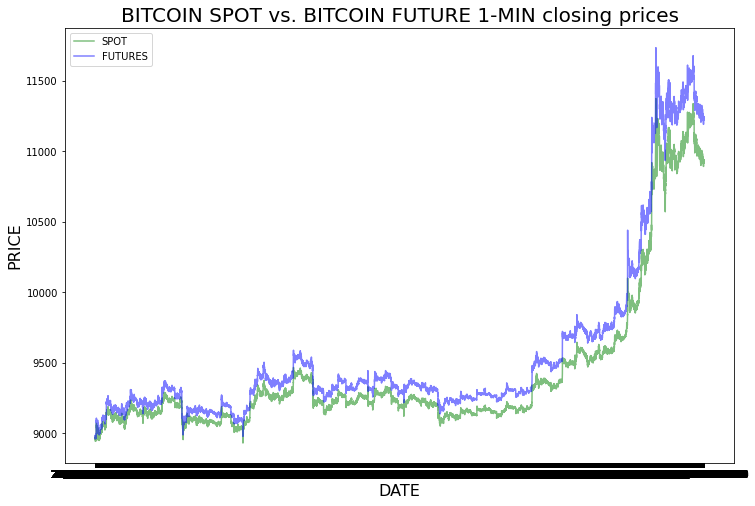

In [23]:

plt.figure(figsize=(12, 8))

plt.plot(bitcoin_spot_df["TIMESTAMP"], bitcoin_spot_df["CLOSE"], color='green', alpha=0.5, label='SPOT')
plt.plot(bitcoin_futures_df["TIMESTAMP"], bitcoin_futures_df["CLOSE"], color='blue', alpha=0.5, label='FUTURES')

plt.title('BITCOIN SPOT vs. BITCOIN FUTURE 1-MIN closing prices', fontsize=20)
plt.xlabel('DATE', fontsize=16)
plt.ylabel('PRICE', fontsize=16)
plt.legend(['SPOT', 'FUTURES'])
plt.show()

In [31]:
bitcoin_futures_df.set_index(pd.to_datetime(bitcoin_futures_df['TIMESTAMP']), inplace=True)

In [32]:
bitcoin_futures_df.tail()

,TIMESTAMP,OPEN,HIGH,LOW,CLOSE,VOLUME,close_time,quote_volume,trades,taker_base_volue,taker_quote_volume,ignore
TIMESTAMP,,,,,,,,,,,,
2020-07-30 12:49:00,30/07/2020 12:49,11229.8,11230.5,11229.8,11230.4,315,1.600000e+12,2.804892,5,25,0.222620,0
2020-07-30 12:50:00,30/07/2020 12:50,11230.6,11237.8,11230.6,11237.8,169,1.600000e+12,1.504542,11,162,1.442231,0
2020-07-30 12:51:00,30/07/2020 12:51,11238.5,11239.2,11238.5,11239.2,114,1.600000e+12,1.014308,4,2,0.017796,0
2020-07-30 12:52:00,30/07/2020 12:52,11239.3,11239.9,11238.2,11238.2,666,1.600000e+12,5.925712,20,168,1.494797,0
2020-07-30 12:53:00,30/07/2020 12:53,11239.8,11239.8,11234.8,11234.8,561,1.600000e+12,4.992248,15,132,1.174813,0


In [33]:
bitcoin_spot_df.set_index(pd.to_datetime(bitcoin_spot_df['TIMESTAMP']), inplace=True)

In [34]:
bitcoin_spot_df.tail()

,TIMESTAMP,OPEN,HIGH,LOW,CLOSE,VOLUME,close_time,quote_volume,trades,taker_base_volue,taker_quote_volume,ignore
TIMESTAMP,,,,,,,,,,,,
2020-07-30 12:49:00,30/07/2020 12:49,10925.62,10929.43,10924.83,10928.70,21.322603,1.596110e+12,232999.3790,631,11.006401,120272.9447,0
2020-07-30 12:50:00,30/07/2020 12:50,10928.88,10935.00,10927.21,10934.99,29.036445,1.596110e+12,317414.8958,644,9.913961,108385.4821,0
2020-07-30 12:51:00,30/07/2020 12:51,10935.00,10936.47,10934.00,10935.00,50.125957,1.596110e+12,548115.1078,433,40.548959,443389.9326,0
2020-07-30 12:52:00,30/07/2020 12:52,10935.00,10938.08,10933.18,10937.34,26.610520,1.596110e+12,291004.4304,472,21.335300,233317.5542,0
2020-07-30 12:53:00,30/07/2020 12:53,10937.33,10938.92,10930.51,10933.79,36.956631,1.596110e+12,404097.0295,623,17.544228,191836.7466,0


In [35]:
basis_price_df = pd.concat([bitcoin_futures_df['CLOSE'], bitcoin_spot_df["CLOSE"]], axis = 1)

In [36]:
basis_price_df.columns = ['FUTURES', 'SPOT']

In [37]:
basis_price_df['BASIS'] = basis_price_df['FUTURES'] - basis_price_df['SPOT']

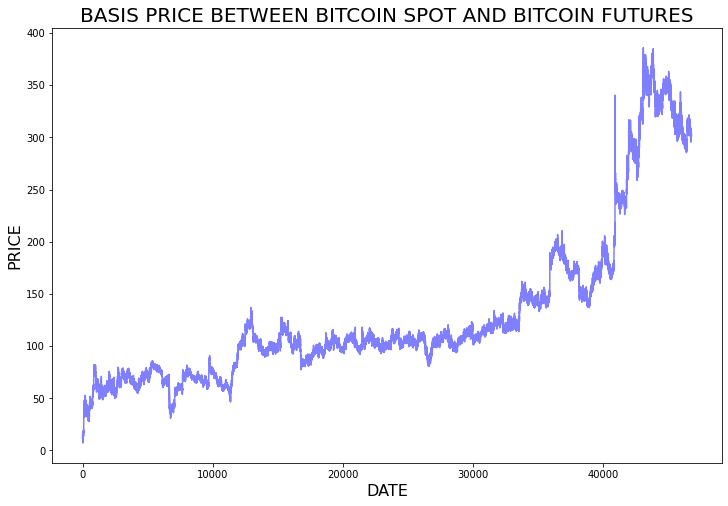

In [31]:

plt.figure(figsize=(12, 8))

#plt.plot(goog_df["TIMESTAMP"], goog_df["CLOSE"], color='green', alpha=0.5, label='GOOG')
plt.plot(basis_price_df['BASIS'].values , color='blue', alpha=0.5, label='BASIS PRICE')
#plt.plot(googl_df["TIMESTAMP"], googl_df["CLOSE"], color='blue', alpha=0.5, label='GOOGL')
plt.title('BASIS PRICE BETWEEN BITCOIN SPOT AND BITCOIN FUTURES', fontsize=20)
plt.xlabel('DATE', fontsize=16)
plt.ylabel('PRICE', fontsize=16)
plt.show()
#plt.grid()

In [38]:
basis_price_df

,FUTURES,SPOT,BASIS
TIMESTAMP,,,
2020-06-27 21:34:00,8983.2,8970.83,12.37
2020-06-27 21:35:00,8983.3,8970.00,13.30
2020-06-27 21:36:00,8983.5,8971.69,11.81
2020-06-27 21:37:00,8981.4,8966.21,15.19
2020-06-27 21:38:00,8972.7,8961.74,10.96
...,...,...,...
2020-07-30 12:49:00,11230.4,10928.70,301.70
2020-07-30 12:50:00,11237.8,10934.99,302.81
2020-07-30 12:51:00,11239.2,10935.00,304.20


In [39]:
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


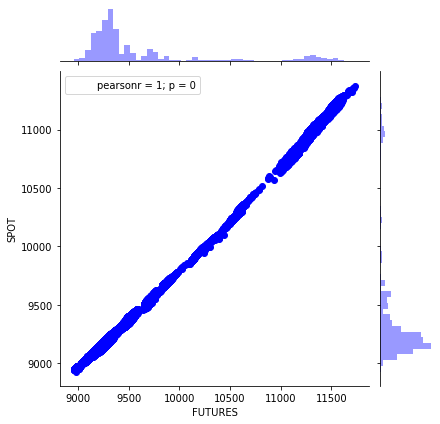

In [41]:
sns.jointplot(basis_price_df.FUTURES, basis_price_df.SPOT ,stat_func=scipy.stats.pearsonr, color='b')
plt.show()

In [42]:
from statsmodels.tsa.stattools import coint

In [43]:
coint_test = coint(basis_price_df['FUTURES'], basis_price_df['SPOT'])

In [44]:
print('Augmented Dickey Fuller test statistic =',coint_test[0])
print('Augmented Dickey Fuller p-value =',coint_test[1])
print('Augmented Dickey Fuller 1%, 5% and 10% test statistics =',coint_test[2])

Augmented Dickey Fuller test statistic = -3.7790972307314914
Augmented Dickey Fuller p-value = 0.014450613890028507
Augmented Dickey Fuller 1%, 5% and 10% test statistics = [-3.89667409 -3.33626059 -3.04454065]


In [45]:
from numpy import log, polyfit, sqrt, std, subtract

In [46]:
#calculate hurst exponent
def hurst_exponent(data):
    intervals = range(2, 100)
    result = [sqrt(std(subtract(data[interval:], data[:-interval]))) for interval in intervals]
    poly_result = polyfit(log(intervals), log(result), 1)
    return poly_result[0]*2.0

In [47]:
hurst(basis_price_df['BASIS'].values)

0.3409027305763123

In [48]:
import statsmodels.api as sm

In [49]:
#calculate halflife
spr_interval = basis_price_df.BASIS.shift(1)
spr_interval.iloc[0] = spr_interval.iloc[1]
spr_return = basis_price_df['BASIS'] - spr_interval
spr_return.iloc[0] = spr_return.iloc[1]
spr_interval2 = sm.add_constant(spr_interval)
model = sm.OLS(spread_return,spr_interval2)
result = model.fit()
halflife = round(-np.log(2) / result.params[1],0)
print('Halflife = ',halflife)

Halflife =  2320.0
